<a href="https://colab.research.google.com/github/SamuGalli/DIQ/blob/main/Data_Profiling_first_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. DATA PROFILING**

Import libraries:

In [1]:
!pip install sweetviz lux-api autoviz plotly matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0:00:00
  Created wheel for lux-api: fil

In [2]:
import pandas as pd
import json
import seaborn as sns
import sweetviz as sv
import lux
from autoviz import AutoViz_Class
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Import data:

In [3]:
HOTELS = pd.read_csv(
    "https://raw.githubusercontent.com/SamuGalli/DIQ/main/Comune-di-Milano---Strutture-ricettive-alberghiere.csv",
    sep=';',
    encoding='unicode_escape'
)

Basic profiling activities:

In [5]:
HOTELS.shape

(451, 15)

In [6]:
#To see all the data types present
HOTELS.dtypes

Ubicazione                       object
Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object


In [7]:
#display numeric columns
NUM = list(HOTELS.select_dtypes(include=['int64','float64']).columns)
NUM

['Civico', 'Codice via', 'ZD', 'Camere', 'Piani totali', 'Posti letto']

In [8]:
#display categorical columns
CAT = list(HOTELS.select_dtypes(include=['bool','object']).columns)
CAT

['Ubicazione',
 'Tipo via',
 'Descrizione via',
 'Camere piano',
 'Categoria',
 'Insegna',
 'Piano piano',
 'Posti letto per piano',
 'Tipo attività struture extra']

**SINGLE COLUMN ANALYSIS**

**Cardinalities**

Cardinalities are numbers that summarize simple metadata (*e.g.,* number of rows, attributes, null values, distinct values, Uniqueness and Distinctness).

*Cardinality* = count of the number of distinct actual values.

*Uniqueness* = percentage calculated as Cardinality divided by the total number of records.

*Actual* = count of the number of records with an actual value (*i.e.,* not-null).

*Distinctness* = percentage calculated as Cardinality divided by Actual.

In [12]:
#len command counts the number of rows, those are always the same
ROWS = len(HOTELS['Ubicazione'])
ROWS

451

In [13]:
ROW1 = len(HOTELS['Tipo via'])
ROW1

451

In [14]:
ROW2 = len(HOTELS['Camere'])
ROW2

451

In [17]:
#number of cells with shape function
CELLS = HOTELS.shape[0] * HOTELS.shape[1]
CELLS

6765

In [18]:
#number of non—null observation in a column (attribute "Ubicazione")
COUNT = HOTELS['Ubicazione'].count()
COUNT

451

In [20]:
#value counts is the same of a group by (attribute "ibu")
HOTELS['Ubicazione'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
#nunique is the number of distict values for an attribute (attribute "ibu")
DISTINCT = (HOTELS['Ubicazione'].nunique())
DISTINCT

438

UNIQUENESS EVALUATION ON UBICAZIONE ATTRIBUTE:

In [24]:
#for attribute "Ubicazione"
UNIQUENESS = DISTINCT / ROWS
print("UNIQUENESS: ", UNIQUENESS)

UNIQUENESS:  0.9711751662971175


DISTINCTNESS EVALUATION ON UBICAZIONE ATTRIBUTE:

In [25]:
#for attribute "Ubicazione"
DISTINCTNESS = DISTINCT / COUNT
print("DISTINCTNESS: ", DISTINCTNESS)

DISTINCTNESS:  0.9711751662971175


NOW THE SAME FOR ATTRIBUTE TIPO VIA

In [30]:
#number of non—null observation in a column (attribute "Tipo via")
COUNT = HOTELS['Tipo via'].count()
COUNT

437

In [33]:
#nunique is the number of distict values for an attribute (attribute "Tipo via")
DISTINCT = (HOTELS['Tipo via'].nunique())
DISTINCT

8

In [28]:
#for attribute "Tipo via"
UNIQUENESS = DISTINCT / ROWS
print("UNIQUENESS: ", UNIQUENESS)

UNIQUENESS:  0.9711751662971175


In [34]:
#for attribute "Tipo via"
DISTINCTNESS = DISTINCT / COUNT
print("DISTINCTNESS: ", DISTINCTNESS)

DISTINCTNESS:  0.018306636155606407


NOW FOR DESCRIZIONE VIA

In [40]:
COUNT = HOTELS['Descrizione via'].count()
DISTINCT = (HOTELS['Descrizione via'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.6651884700665188
DISTINCTNESS:  0.6864988558352403


CIVICO:

In [41]:
COUNT = HOTELS['Civico'].count()
DISTINCT = (HOTELS['Civico'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.19955654101995565
DISTINCTNESS:  0.21377672209026127


CODICE VIA

In [42]:
COUNT = HOTELS['Codice via'].count()
DISTINCT = (HOTELS['Codice via'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.6696230598669624
DISTINCTNESS:  0.6910755148741419


ZD

In [43]:
COUNT = HOTELS['ZD'].count()
DISTINCT = (HOTELS['ZD'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.019955654101995565
DISTINCTNESS:  0.020594965675057208


CAMERE

In [44]:
COUNT = HOTELS['Camere'].count()
DISTINCT = (HOTELS['Camere'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.328159645232816
DISTINCTNESS:  0.3288888888888889


Camere piano

In [45]:
COUNT = HOTELS['Camere piano'].count()
DISTINCT = (HOTELS['Camere piano'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.458980044345898
DISTINCTNESS:  0.6


Categoria

In [46]:
COUNT = HOTELS['Categoria'].count()
DISTINCT = (HOTELS['Categoria'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.017738359201773836
DISTINCTNESS:  0.018018018018018018


Insegna

In [47]:
COUNT = HOTELS['Insegna'].count()
DISTINCT = (HOTELS['Insegna'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.9689578713968958
DISTINCTNESS:  0.9909297052154195


Piani totali

In [48]:
COUNT = HOTELS['Piani totali'].count()
DISTINCT = (HOTELS['Piani totali'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.024390243902439025
DISTINCTNESS:  0.058823529411764705


Piano piano

In [49]:
COUNT = HOTELS['Piano piano'].count()
DISTINCT = (HOTELS['Piano piano'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.1286031042128603
DISTINCTNESS:  0.2914572864321608


Posti letto

In [50]:
COUNT = HOTELS['Posti letto'].count()
DISTINCT = (HOTELS['Posti letto'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.43458980044345896
DISTINCTNESS:  0.43555555555555553


Posti letto per piano

In [51]:
COUNT = HOTELS['Posti letto per piano'].count()
DISTINCT = (HOTELS['Posti letto per piano'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.48558758314855877
DISTINCTNESS:  0.6347826086956522


Tipo attività struture extra

In [52]:
COUNT = HOTELS['Tipo attività struture extra'].count()
DISTINCT = (HOTELS['Tipo attività struture extra'].nunique())
UNIQUENESS = DISTINCT / ROWS
DISTINCTNESS = DISTINCT / COUNT
print("UNIQUENESS: ", UNIQUENESS)
print("DISTINCTNESS: ", DISTINCTNESS)

UNIQUENESS:  0.0066518847006651885
DISTINCTNESS:  0.006802721088435374


**Value distributions**

Value distributions summarize the distribution of values within a column (*e.g.,* extremes and Constancy). A common representation for value distributions are Histograms.

*Constancy* = frequency of the most frequent value divided by the total number of values. It might reveals the presence of standard values.

In [54]:
#extremes (attribute "Camere")
print ('MIN:', HOTELS['Camere'].min())
print ('MAX:', HOTELS['Camere'].max())
print ('MODE:', HOTELS['Camere'].mode()[0])

MIN: 7.0
MAX: 439.0
MODE: 10.0


In [57]:
#extremes (attribute "Posti letto")
print ('MIN:', HOTELS['Posti letto'].min())
print ('MAX:', HOTELS['Posti letto'].max())
print ('MODE:', HOTELS['Posti letto'].mode()[0])

MIN: 7.0
MAX: 922.0
MODE: 25.0


In [53]:
#extremes (all attributes)
print ('MIN: ', HOTELS[NUM].min())
print("\n\n")
print ('MAX: ', HOTELS[NUM].max())

MIN:  Civico          1.0
Codice via      1.0
ZD              1.0
Camere          7.0
Piani totali    1.0
Posti letto     7.0
dtype: float64



MAX:  Civico          41609.0
Codice via       7505.0
ZD                  9.0
Camere            439.0
Piani totali       17.0
Posti letto       922.0
dtype: float64


In [55]:
#other information: Mean and Standard deviation on Camere
print('Average:', HOTELS['Camere'].mean())
print('Standard Deviation:', HOTELS['Camere'].std())

Average: 60.00222222222222
Standard Deviation: 70.44113304348103


In [58]:
print('Average:', HOTELS['Posti letto'].mean())
print('Standard Deviation:', HOTELS['Posti letto'].std())

Average: 114.1288888888889
Standard Deviation: 141.01354816873751


In [56]:
#find max of value counts (attribute "Camere")
MAX_COUNTS = max(HOTELS['Camere'].value_counts())
MAX_COUNTS

24

CONSTANCY EVALUATION:

In [60]:
#for attribute "Camere"
COUNT = HOTELS['Camere'].count()
CONSTANCY = MAX_COUNTS / COUNT
print("CONSTANCY: ", CONSTANCY)

CONSTANCY:  0.05333333333333334


In [73]:
#for attribute "Posti letto"
COUNT = HOTELS['Posti letto'].count()
MAX_COUNTS = max(HOTELS['Posti letto'].value_counts())
CONSTANCY = MAX_COUNTS / COUNT
print("CONSTANCY: ", CONSTANCY)

CONSTANCY:  0.07777777777777778


**Histograms** are often used to fit distributions to the data. Analysts can check if the values of some columns are (approximately) normally distributed, and the number of outliers may be returned.


<Axes: >

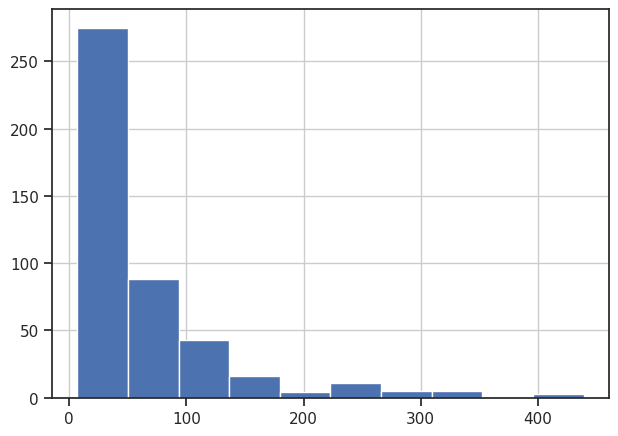

In [74]:
#plot the distribution of the attribute "ibu" with hist function
HOTELS['Camere'].hist()

In [62]:
#describe function get different properties for all the numerical attributes of the table
HOTELS.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

from matplotlib import pyplot as plt
_df_0['Civico'].plot(kind='hist', bins=20, title='Civico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Codice via'].plot(kind='hist', bins=20, title='Codice via')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ZD'].plot(kind='hist', bins=20, title='ZD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Camere'].plot(kind='hist', bins=20, title='Camere')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Civico', y='Codice via', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Codice via', y='ZD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ZD', y='Camere', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Camere', y='Piani totali', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Civico'].plot(kind='line', figsize=(8, 4), title='Civico')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Codice via'].plot(kind='line', figsize=(8, 4), title='Codice via')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ZD'].plot(kind='line', figsize=(8, 4), title='ZD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Camere'].plot(kind='line', figsize=(8, 4), title='Camere')
plt.gca().spines[['top', 'right']].set_visible(False)

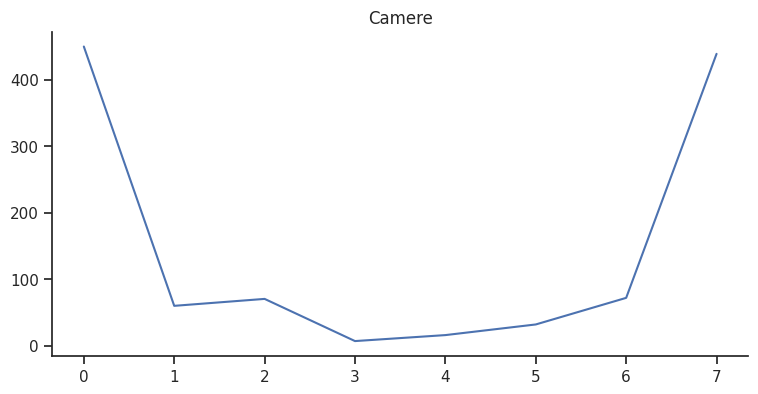

In [67]:
from matplotlib import pyplot as plt
_df_11['Camere'].plot(kind='line', figsize=(8, 4), title='Camere')
plt.gca().spines[['top', 'right']].set_visible(False)

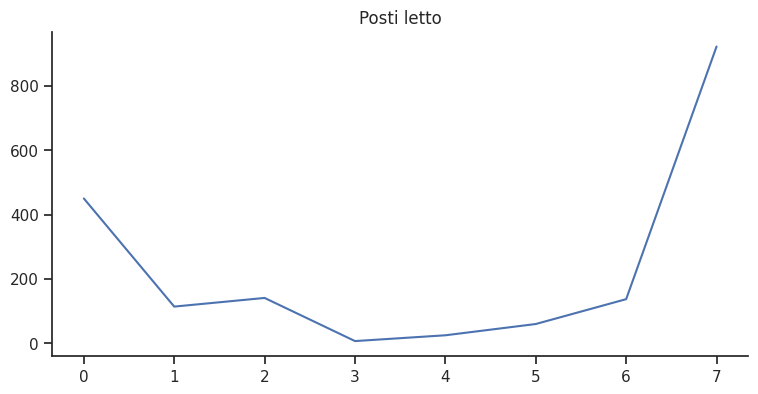

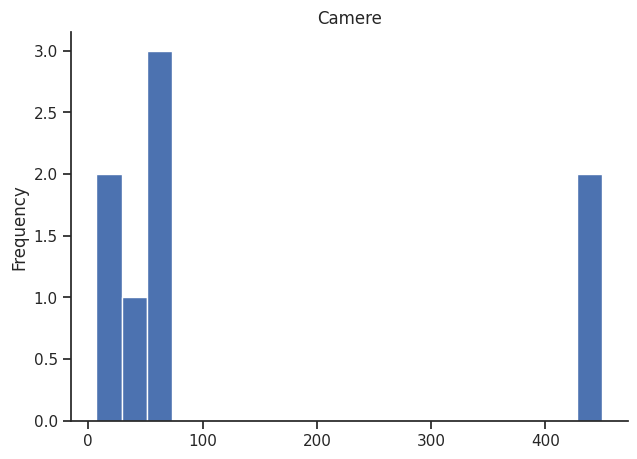

In [64]:
from matplotlib import pyplot as plt
_df_3['Camere'].plot(kind='hist', bins=20, title='Camere')
plt.gca().spines[['top', 'right',]].set_visible(False)

array([[<Axes: title={'center': 'Civico'}>,
        <Axes: title={'center': 'Camere'}>]], dtype=object)

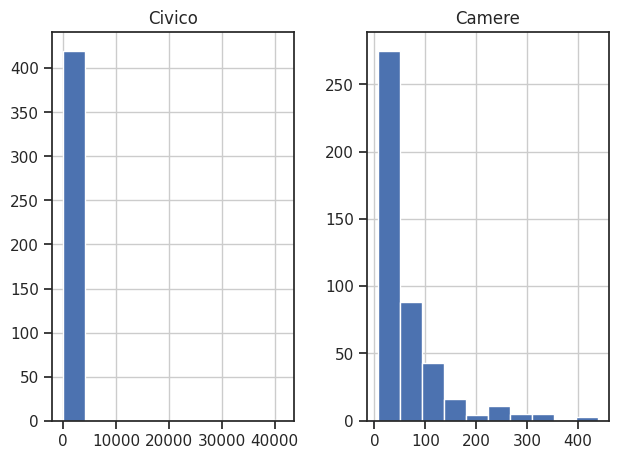

In [69]:
#we can also display multiple histograms
HOTELS[['Civico','Camere']].hist()

In [70]:
#correlation evaluation base on pearson correlation coefficient
HOTELS[NUM].corr(method='pearson')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

from matplotlib import pyplot as plt
_df_12['Civico'].plot(kind='hist', bins=20, title='Civico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Codice via'].plot(kind='hist', bins=20, title='Codice via')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['ZD'].plot(kind='hist', bins=20, title='ZD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Camere'].plot(kind='hist', bins=20, title='Camere')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Civico', y='Codice via', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Codice via', y='ZD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='ZD', y='Camere', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Camere', y='Piani totali', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Civico'].plot(kind='line', figsize=(8, 4), title='Civico')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Codice via'].plot(kind='line', figsize=(8, 4), title='Codice via')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['ZD'].plot(kind='line', figsize=(8, 4), title='ZD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Camere'].plot(kind='line', figsize=(8, 4), title='Camere')
plt.gca().spines[['top', 'right']].set_visible(False)